In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
import pdfkit


/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_53787/2492746747.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# load csv
df = pd.read_csv("train.csv")
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/media/ofotechjkr/storage01/tf_object_detectio...,800,600,traffic_sign,292,239,355,312
1,/media/ofotechjkr/storage01/tf_object_detectio...,800,600,traffic_sign,163,221,215,288
2,/media/ofotechjkr/storage01/tf_object_detectio...,640,480,traffic_sign,43,238,103,419
3,/media/ofotechjkr/storage01/tf_object_detectio...,640,480,traffic_sign,170,123,218,168
4,/media/ofotechjkr/storage01/tf_object_detectio...,640,480,traffic_sign,436,2,640,131


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  531 non-null    object
 1   width     531 non-null    int64 
 2   height    531 non-null    int64 
 3   class     531 non-null    object
 4   xmin      531 non-null    int64 
 5   ymin      531 non-null    int64 
 6   xmax      531 non-null    int64 
 7   ymax      531 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.3+ KB


In [4]:
# check for missing values or NaN or null
df.isnull().sum()

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64

In [5]:
df.describe()

,width,height,xmin,ymin,xmax,ymax
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,705.386064,529.039548,329.489642,187.403013,405.101695,272.003766
std,78.728047,59.046035,204.775647,55.354701,204.090336,65.872776
min,640.000000,480.000000,0.000000,0.000000,42.000000,118.000000
25%,640.000000,480.000000,148.000000,171.000000,215.000000,235.000000
50%,640.000000,480.000000,318.000000,197.000000,416.000000,261.000000
75%,800.000000,600.000000,512.000000,218.500000,576.500000,299.000000
max,800.000000,600.000000,747.000000,429.000000,800.000000,600.000000


In [6]:
# check for unique value on each column
df.nunique()

filename    503
width         2
height        2
class         2
xmin        355
ymin        186
xmax        370
ymax        207
dtype: int64

In [7]:
#double check for duplicated rows
duplicated_count = df.duplicated().sum()

print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 0


# Exploratory Data Analysis

In [8]:
profile = pandas_profiling.ProfileReport(df)
# report_path = "report.html"
# profile.to_file(report_path)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# pdfkit.from_file(report_path, 'report.pdf')

# Dataset Distribution Visualization

In [10]:
class_count = df['class'].value_counts()
class_count

class
traffic_sign    404
ads_sign        127
Name: count, dtype: int64

[Text(0, 0, '404'), Text(0, 0, '127')]

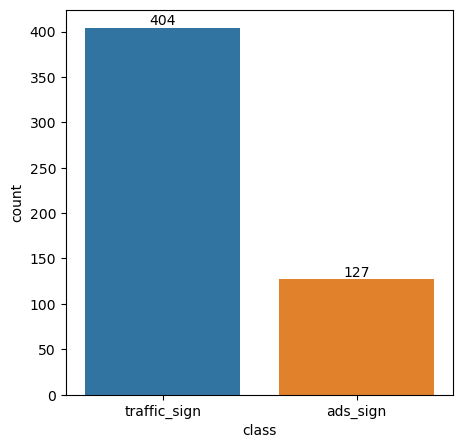

In [11]:
# conventional visualization
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x = 'class', data = df)
ax.bar_label(ax.containers[0])

In [12]:
percentage_distribution = df['class'].value_counts(normalize=True) * 100
percentage_distribution

class
traffic_sign    76.082863
ads_sign        23.917137
Name: proportion, dtype: float64

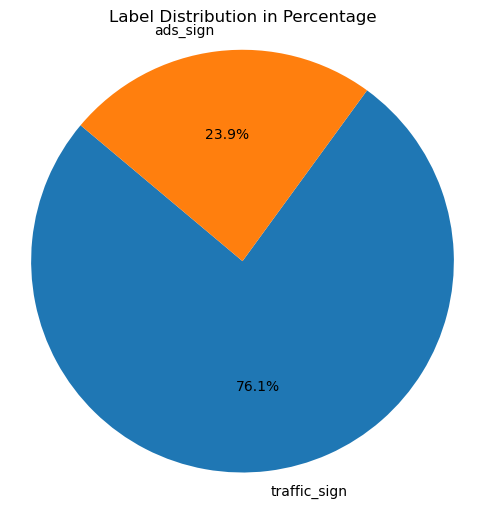

In [13]:
plt.figure(figsize=(6, 6))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution in Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is a circle.

plt.show()
